In [14]:
thresh = 0.9869

In [15]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [16]:
callbacks = myCallback()

In [17]:
train_path = '/Users/kshitijaupasham/Desktop/DevanagariHandwrittenCharacterDataset/Train'
test_path = '/Users/kshitijaupasham/Desktop/DevanagariHandwrittenCharacterDataset/Test'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(train_path,target_size=(28, 28),color_mode='grayscale',class_mode='categorical',batch_size=32)
test = test_datagen.flow_from_directory(test_path,target_size=(28, 28),color_mode='grayscale',class_mode='categorical',batch_size=32)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [20]:
model = Sequential()

model.add(Conv2D(28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(56, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(46, activation = "softmax"))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [23]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=30, callbacks=[callbacks])

Epoch 1/30
2443/2443 [==============================] - 136s 56ms/step - loss: 1.5306 - accuracy: 0.5698 - val_loss: 0.2544 - val_accuracy: 0.9259
Epoch 2/30
2443/2443 [==============================] - 134s 55ms/step - loss: 0.4127 - accuracy: 0.8856 - val_loss: 0.1437 - val_accuracy: 0.9578
Epoch 3/30
2443/2443 [==============================] - 132s 54ms/step - loss: 0.2969 - accuracy: 0.9208 - val_loss: 0.1228 - val_accuracy: 0.9660
Epoch 4/30
2443/2443 [==============================] - 131s 53ms/step - loss: 0.2346 - accuracy: 0.9384 - val_loss: 0.1106 - val_accuracy: 0.9711
Epoch 5/30
2443/2443 [==============================] - 127s 52ms/step - loss: 0.2068 - accuracy: 0.9461 - val_loss: 0.0855 - val_accuracy: 0.9779
Epoch 6/30
2443/2443 [==============================] - 129s 53ms/step - loss: 0.1908 - accuracy: 0.9519 - val_loss: 0.0854 - val_accuracy: 0.9785
Epoch 7/30
2443/2443 [==============================] - 131s 53ms/step - loss: 0.1705 - accuracy: 0.9568 - val_loss: 0

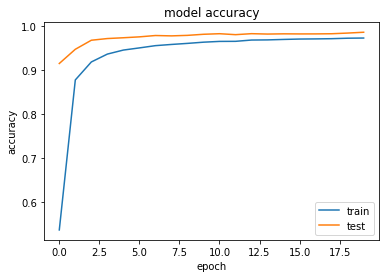

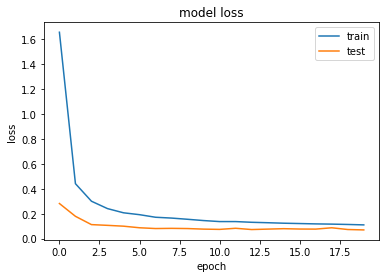

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
98.76

98.76